#Prediction and visualization of various factors affecting Rejection rates in the weaving production

Author:Krishna Saraogi

ID:26635088

Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. Yes

#Introduction

Rejection rates in weaving production are a critical indicator of manufacturing efficiency and product quality. Accurate forecasting and analysis of these rejection rates are highly valuable for manufacturers aiming to minimize waste, optimize resources, and enhance output. Decision-makers in the textile industry, such as production managers and quality control teams, can use these forecasts to implement proactive measures that improve overall productivity.

In this project, I began by compiling and preprocessing a dataset containing various production metrics, such as fabric requirements, beam lengths, and shrinkage allowances. I conducted a series of exploratory data analyses to understand the relationships between these factors and rejection rates. Finally, I applied a range of regression models, including traditional statistical methods and advanced machine learning algorithms, to determine which approach offers the most accurate and actionable predictions for rejection rates.

I have taken the data frame from https://www.kaggle.com/datasets/azminetoushikwasi/textile-weaving-dataset-to-predict-rejection/data

In [767]:
#Importing the necessary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import export_graphviz, plot_tree
import graphviz
from xgboost import XGBRegressor

In [768]:
#loading and showcasing the first 5 rows of the dataset
dataset = pd.read_csv('/content/weaving_rejection_dataset.csv')
dataset.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300.0,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651103,27646.0,285,double_40,80.0,110,80
1,40x40/110x90,10450.0,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350432,11019.0,39,40,40.0,110,90
2,40x40/110x80,900.0,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40.0,110,80
3,40x40/130x80,8000.0,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40.0,130,80
4,50x50/140x70,3500.0,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50.0,140,70


# Step 1: Data Exploration/ Visualization
### Finding the important statistical measures for your data


In [769]:
dataset.describe()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,weft_count,epi,ppi
count,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000,22010.000000
mean,9843.822308,9.089901,8880.315263,13.375289,10628.742383,11115.469638,6181.516686,55.942254,41.333485,120.117992,81.931622
std,21768.747242,3.638308,23447.095997,2.979386,23466.551812,24555.159025,18045.242259,167.090065,7.550584,15.284722,9.370112
min,50.000000,5.000000,43.744000,6.000000,54.347826,56.473019,0.000000,0.000000,20.000000,30.000000,42.000000
25%,1350.000000,7.000000,1328.724000,11.200000,1520.270270,1639.132463,451.000000,0.000000,40.000000,110.000000,80.000000
50%,2950.000000,8.000000,2843.360000,14.000000,3175.268817,3291.012518,1708.000000,12.000000,40.000000,120.000000,80.000000
75%,6560.000000,10.000000,6364.752000,14.600000,7130.434783,7342.530553,4384.000000,45.000000,40.000000,130.000000,90.000000
max,172800.000000,44.000000,292116.964000,40.800000,192427.616927,211997.533212,245895.000000,3262.000000,140.000000,170.000000,110.000000


In [770]:
#Gives the shape of the dataframe(rows,columns)
dataset.shape

(22010, 14)

In [771]:
dataset.describe(include='O')

,Construction,Previous_pdn,warp_count
count,22010,22010,22010
unique,127,1,10
top,40x40/110x90,TOTAL,40
freq,3502,22010,16792


The next statement is again to visualize and it shows that in most columns there are outliers in the sequence that might skew the average of the values.


<Figure size 2000x2000 with 0 Axes>

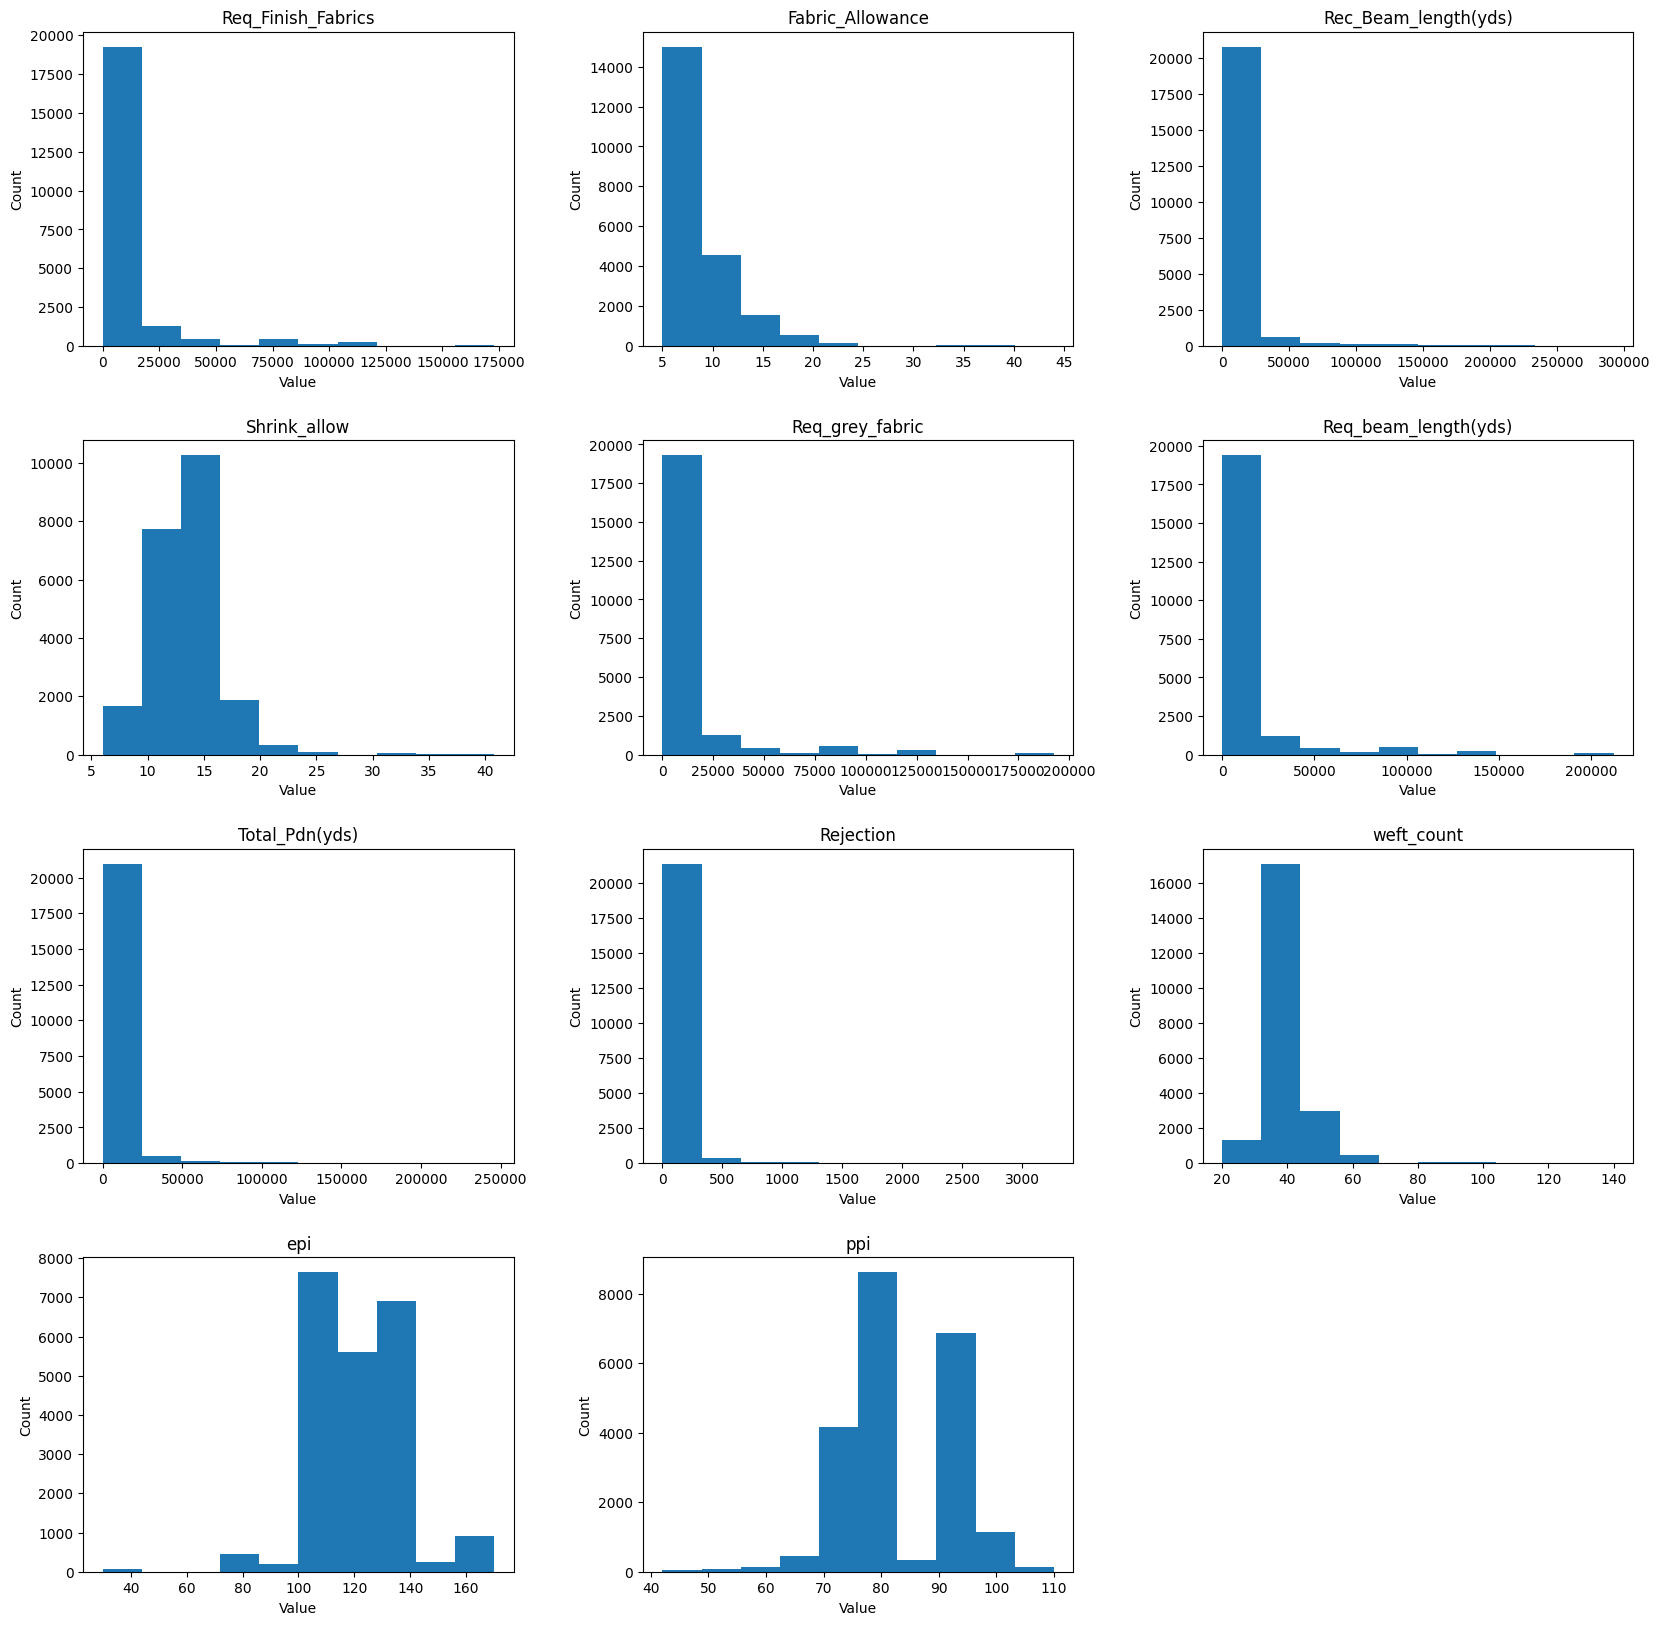

In [772]:
fig = plt.figure(figsize=[20, 20])
axes = dataset.hist(figsize=[20, 20], grid=False)
for ax in axes.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
plt.show()

In [773]:
#This finds the categorical data columns
for column in dataset.columns :
  if dataset[column].dtype == 'object':
    print(column)

Construction
Previous_pdn
warp_count


## Find the trends and plot your data
To see how different values affect rejection

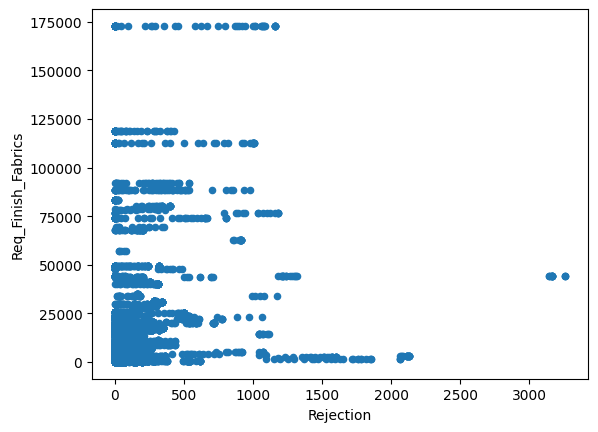

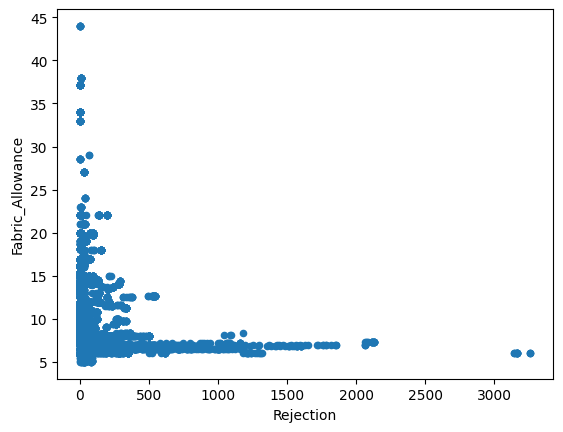

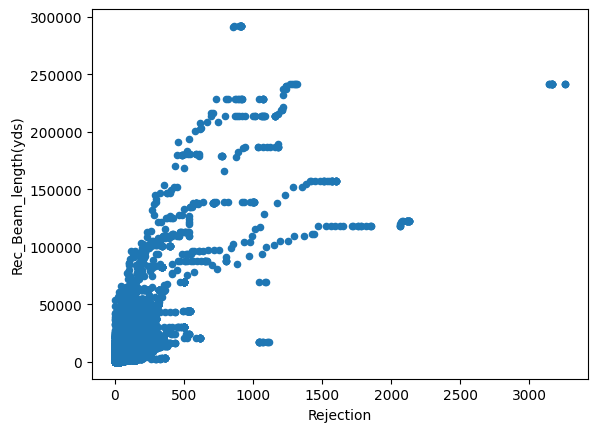

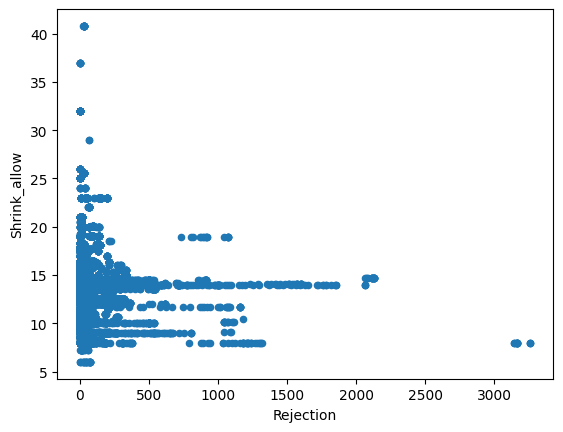

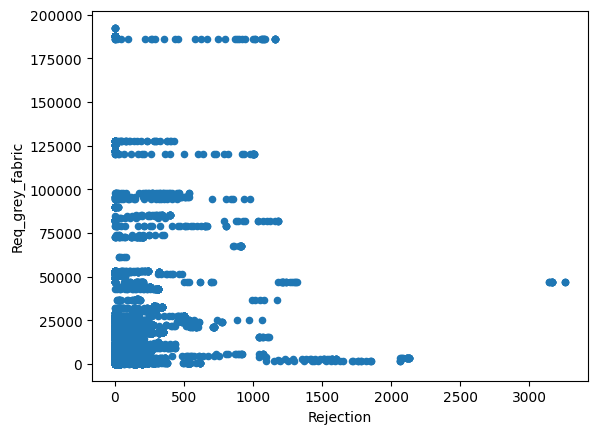

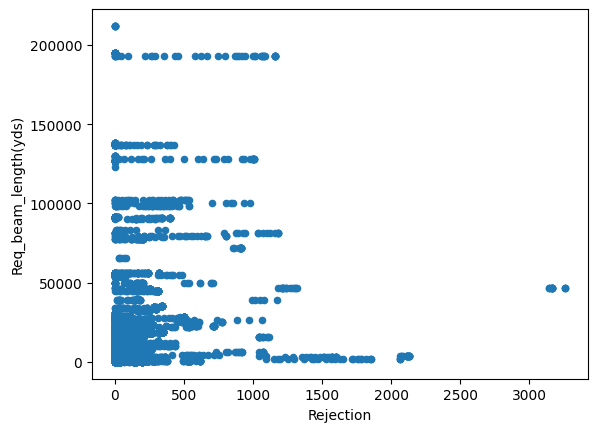

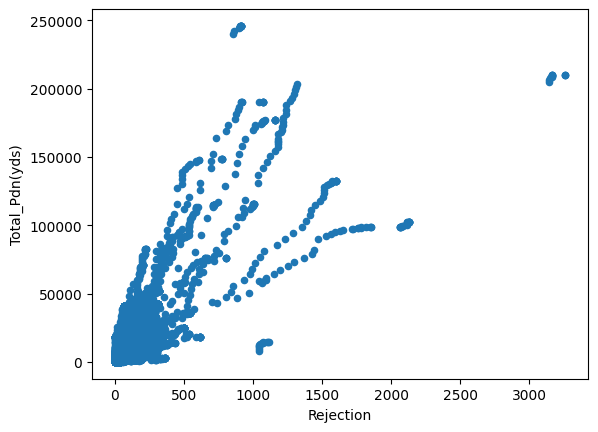

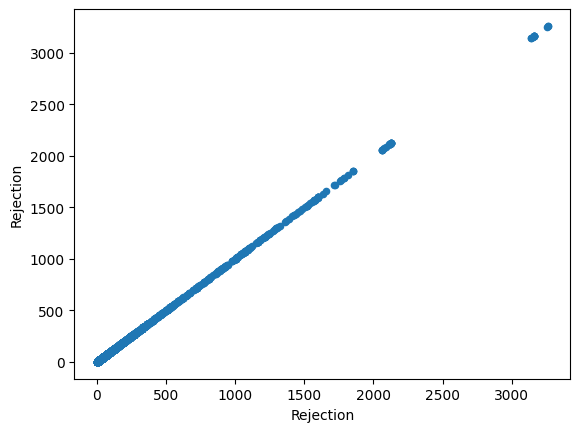

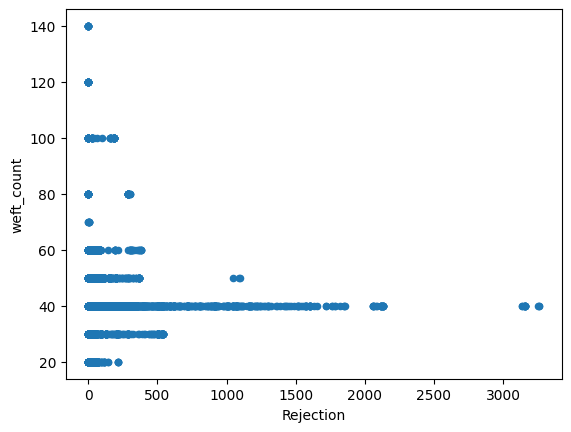

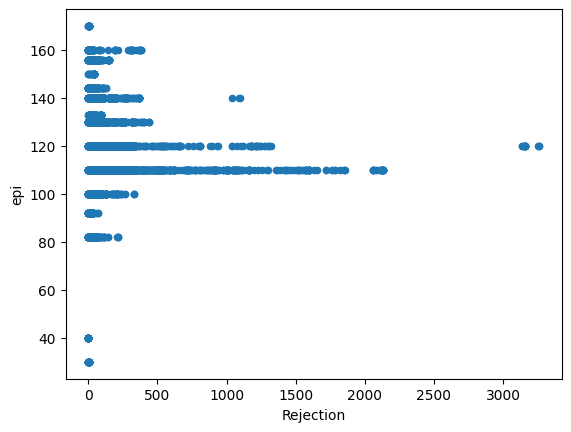

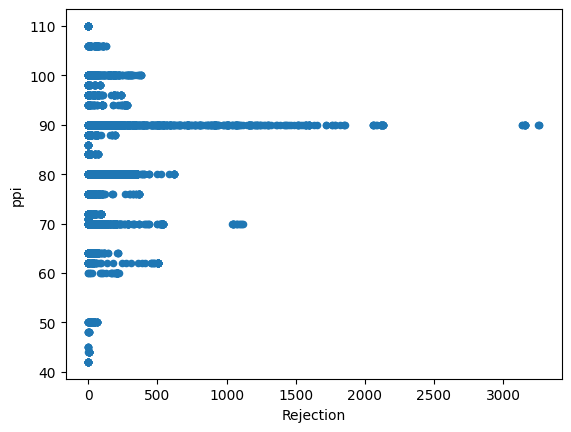

In [774]:
for column in dataset.columns :
  if dataset[column].dtype != 'object':
    dataset.plot(x='Rejection',y=column,kind='scatter')

Just from visualizing the graph of data we can we can see rejection and Total_Pdn(yds) are directly proportional and so is the Rec_Beam_length(yds) and rejection,ie as Rec_Beam_length(yds)/Total_Pdn(yds) increases the rejection also increases.

#Step 2: Data Pre-processing
Remove duplicate data

In [775]:
dataset.drop_duplicates(inplace=True)

In [776]:
dataset.shape

(10383, 14)

In [777]:
dataset.describe(include='O')

,Construction,Previous_pdn,warp_count
count,10383,10383,10383
unique,127,1,10
top,40x40/120x80,TOTAL,40
freq,1827,10383,7985


## Dropping Extra Columns

Therefore the construction column was dropped as the categorical data was very unique and it would not help much in prediction of Rejection.

Previous_pdn has only one value which is was not going to help.



In [778]:
dataset.drop(["Construction","Previous_pdn"], axis = 1, inplace = True)

##Handling the warp count data

The column warp_count includes string data like 'double_40' which means that 2 threads of 40 count are weaved to make a single thread and that is weaved together to make the fabric.This is information can be useful to predict the rejection so instead of doubling 40 to replace all values with 80. We have introduced a new binary coloumn 'is_double' to keep track of using two threads while making the warp_count column numerical data.

In [779]:
dataset['thread_count'] = dataset['warp_count'].str.extract('(\d+)').astype(int)  # Extract numbers
dataset['is_double'] = dataset['warp_count'].str.contains('double').astype(int)  # Binary encoding
dataset.drop('warp_count', axis=1, inplace=True)
dataset

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,weft_count,epi,ppi,thread_count,is_double
0,31300.0,6.0,38286.9360,12.5,33297.872340,34797.651103,27646.0,285,80.0,110,80,40,1
1,10450.0,7.0,13057.5840,14.5,11236.559140,12017.350432,11019.0,39,40.0,110,90,40,0
2,900.0,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40.0,110,80,40,0
3,8000.0,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40.0,130,80,40,0
4,3500.0,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50.0,140,70,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21970,1600.0,7.1,3597.9440,15.3,1722.282024,1859.355175,1388.0,16,40.0,120,80,40,0
21971,2400.0,8.4,3062.0800,14.5,2620.087336,2802.148531,249.0,12,40.0,130,80,40,0
21972,83449.0,7.0,20286.2800,10.2,89730.107527,91369.942153,5849.0,28,40.0,92,70,40,0
22003,83449.0,7.0,120.2960,10.2,89730.107527,91369.942153,85.0,0,40.0,110,90,40,0


Heatmap to see correlation of data

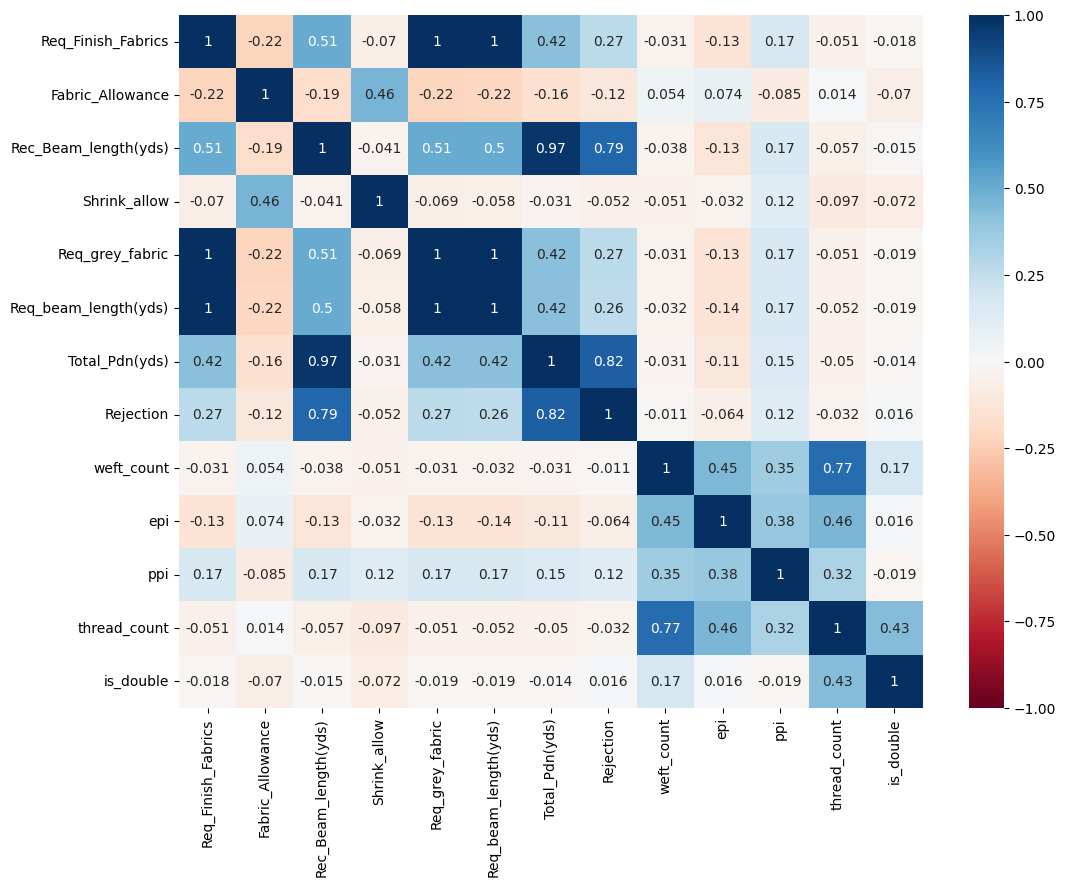

In [780]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(method='pearson'),cmap="RdBu", annot=True,ax=ax,vmin=-1, vmax=1, center= 0);

Req_grey_fabric and Req_beam_length(yds) have a perfectly positive correlation to Req_Finish_Fabrics hence I dropped it as in the heatmap the intersection values are 1.

In [781]:
dataset.drop(["Req_grey_fabric","Req_beam_length(yds)"], axis = 1, inplace = True)
dataset

#More information about this in conclusion
#dataset.drop(["Total_Pdn(yds)"])
#dataset.drop(["Rec_Beam_length(yds)"])

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Total_Pdn(yds),Rejection,weft_count,epi,ppi,thread_count,is_double
0,31300.0,6.0,38286.9360,12.5,27646.0,285,80.0,110,80,40,1
1,10450.0,7.0,13057.5840,14.5,11019.0,39,40.0,110,90,40,0
2,900.0,11.5,1902.8640,12.5,1528.0,0,40.0,110,80,40,0
3,8000.0,8.0,10093.9280,14.0,8944.0,58,40.0,130,80,40,0
4,3500.0,8.1,69146.1408,9.1,59367.0,1043,50.0,140,70,50,0
...,...,...,...,...,...,...,...,...,...,...,...
21970,1600.0,7.1,3597.9440,15.3,1388.0,16,40.0,120,80,40,0
21971,2400.0,8.4,3062.0800,14.5,249.0,12,40.0,130,80,40,0
21972,83449.0,7.0,20286.2800,10.2,5849.0,28,40.0,92,70,40,0
22003,83449.0,7.0,120.2960,10.2,85.0,0,40.0,110,90,40,0


New heat map after dropping highly correlated coloumns

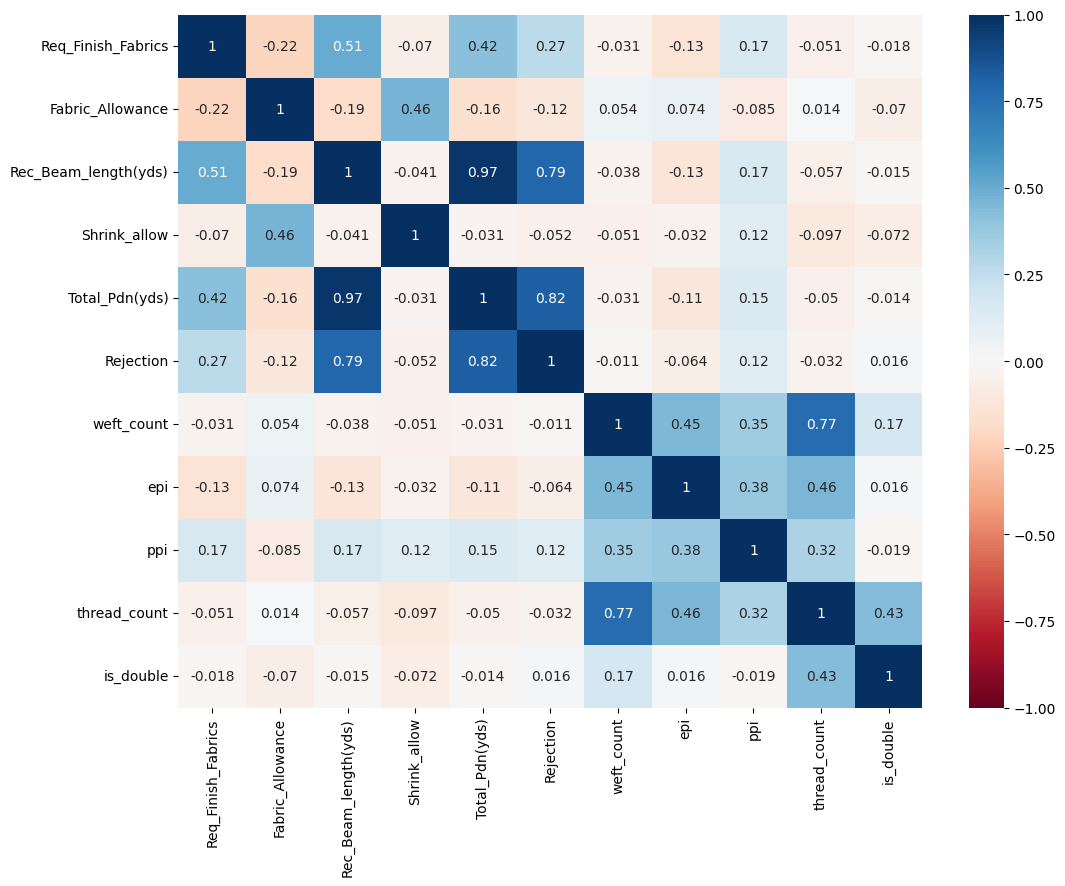

In [782]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(method='pearson'),cmap="RdBu", annot=True,ax=ax,vmin=-1, vmax=1, center= 0);

## Checking the missing values

Finding no. of missing values

In [783]:
nandata=dataset.isnull().sum()
nandata

,0
Req_Finish_Fabrics,0
Fabric_Allowance,0
Rec_Beam_length(yds),0
Shrink_allow,0
Total_Pdn(yds),0
Rejection,0
weft_count,0
epi,0
ppi,0
thread_count,0


There are no missing values in the data

##Splitting and Rearranging the dataset into the Training set and Test set



In [784]:
dataset.columns

Index(['Req_Finish_Fabrics', 'Fabric_Allowance', 'Rec_Beam_length(yds)',
       'Shrink_allow', 'Total_Pdn(yds)', 'Rejection', 'weft_count', 'epi',
       'ppi', 'thread_count', 'is_double'],
      dtype='object')

In [785]:
dataset=dataset[['Req_Finish_Fabrics', 'Fabric_Allowance', 'Rec_Beam_length(yds)','Shrink_allow',
                 'Total_Pdn(yds)','weft_count', 'epi','ppi', 'thread_count', 'is_double', 'Rejection']]

In [786]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [787]:
X

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Total_Pdn(yds),weft_count,epi,ppi,thread_count,is_double
0,31300.0,6.0,38286.9360,12.5,27646.0,80.0,110,80,40,1
1,10450.0,7.0,13057.5840,14.5,11019.0,40.0,110,90,40,0
2,900.0,11.5,1902.8640,12.5,1528.0,40.0,110,80,40,0
3,8000.0,8.0,10093.9280,14.0,8944.0,40.0,130,80,40,0
4,3500.0,8.1,69146.1408,9.1,59367.0,50.0,140,70,50,0
...,...,...,...,...,...,...,...,...,...,...
21970,1600.0,7.1,3597.9440,15.3,1388.0,40.0,120,80,40,0
21971,2400.0,8.4,3062.0800,14.5,249.0,40.0,130,80,40,0
21972,83449.0,7.0,20286.2800,10.2,5849.0,40.0,92,70,40,0
22003,83449.0,7.0,120.2960,10.2,85.0,40.0,110,90,40,0


In [788]:
y

,Rejection
0,285
1,39
2,0
3,58
4,1043
...,...
21970,16
21971,12
21972,28
22003,0


In [789]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

This is a 80% training and 20% testing split

#Step 3: Training & Step 4: Evaluate

## Linear Regression

In [790]:
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [791]:
y_pred = regressor_mlr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate(
    (y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[ 13.88   0.  ]
 [ 19.81 139.  ]
 [ 17.44  29.  ]
 ...
 [ 14.77   0.  ]
 [-89.88   0.  ]
 [133.31  54.  ]]


Combined the predicted values (y_pred) and actual values (y_test) side by side for comparison

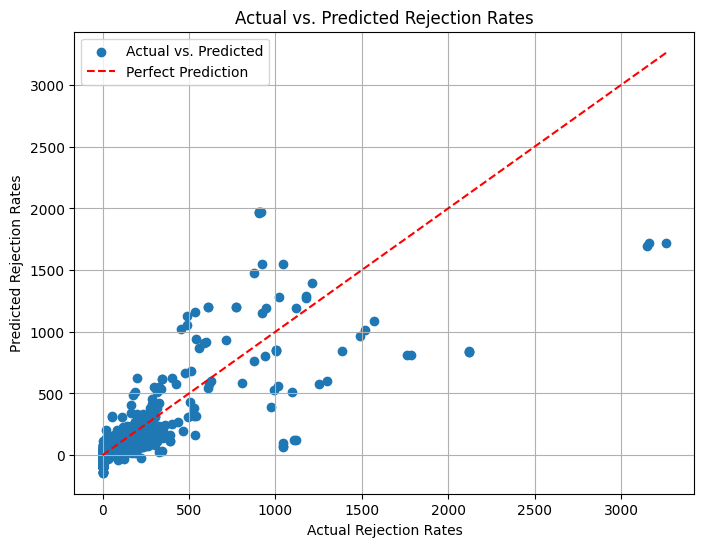

In [792]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [793]:
r2_score(y_test, y_pred)

0.6522871065814979

Accuracy:~65%

## Polynomial Regression

In [794]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor_pr = LinearRegression()
regressor_pr.fit(X_poly, y_train)

LinearRegression()

In [795]:
y_pred = regressor_pr.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[ -8.66   0.  ]
 [ 70.94 139.  ]
 [  7.47  29.  ]
 ...
 [ 22.06   0.  ]
 [ 19.19   0.  ]
 [159.14  54.  ]]


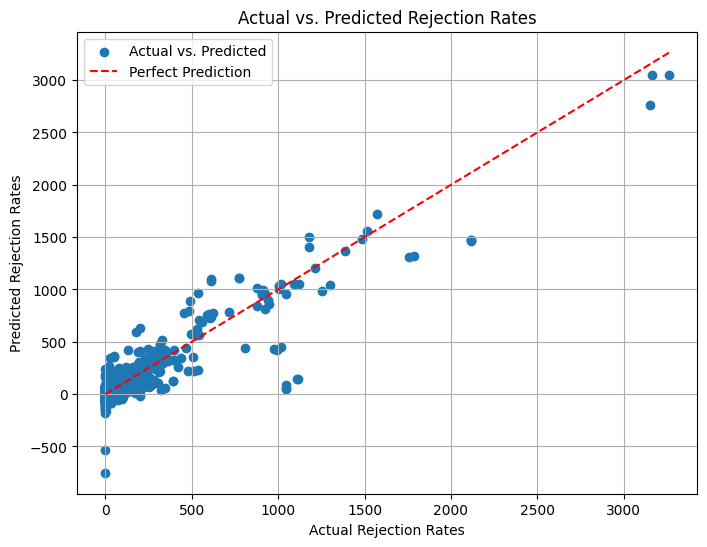

In [796]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [797]:
r2_score(y_test, y_pred)

0.8493012065564285

Improved accuracy:~85%

## Support Vector Regression

Reference: https://www.coursera.org/specializations/machine-learning-introduction


In [798]:
regressor_svr = SVR(kernel = 'rbf') # Gaussian Radial basis function kernel
regressor_svr.fit(X_train, y_train)

SVR()

In [799]:
y_pred = regressor_svr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[  4.71   0.  ]
 [  8.58 139.  ]
 [  9.91  29.  ]
 ...
 [ -1.66   0.  ]
 [ 45.82   0.  ]
 [ 90.57  54.  ]]


Combined the predicted values (y_pred) and actual values (y_test) side by side for comparison

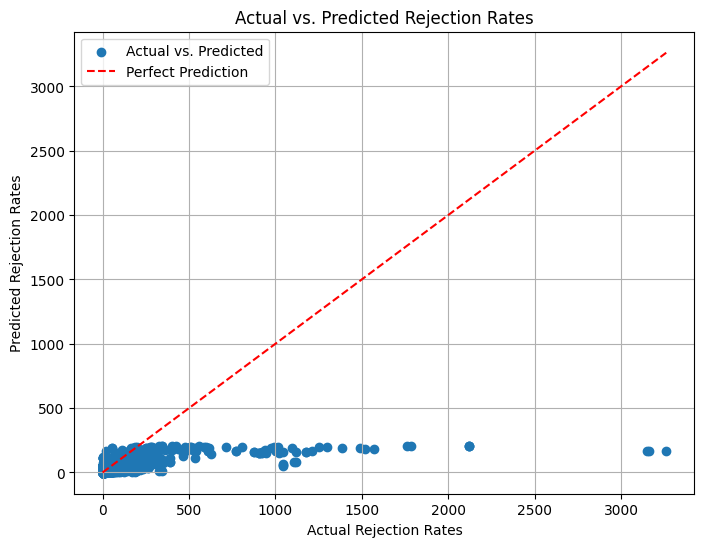

In [800]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [801]:
r2_score(y_test, y_pred)

0.18876622024345147

Very low accuracy:~19%

After **Scaling**

In [802]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [803]:
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_scaled, y_train)

SVR()

In [804]:
y_pred = regressor_svr.predict(X_test_scaled)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis=1))

[[  3.54   0.  ]
 [ 30.33 139.  ]
 [  8.4   29.  ]
 ...
 [ 10.97   0.  ]
 [  7.01   0.  ]
 [ 55.65  54.  ]]


In [805]:
r2_score(y_test, y_pred)

0.09822515923462316

Lower accuracy:~10%

SVMs can struggle with complex relationships in data compared to polynomial regression, which explicitly models non-linear relationships. Our data has complex patterns,therefore SVM might underperform unless hyperparameters are finely tuned.

In [806]:
X_scaled = scaler.fit_transform(X)
svm_model = SVR(kernel='rbf', C=1, gamma=0.1)
scores = cross_val_score(svm_model, X_scaled, y, cv=5)
print(f"Mean CV Score: {scores.mean()}")

Mean CV Score: 0.18991249545238484


Accuracy:~19%

To confirm wheter the accuracy is low due to a certain train test split we try to get a more robust result using **cross validation**. However since the accuracy is still very low we can assume that the model is not a good fit for the data and is struggling with the complex relationships in the data.

## Random Forest Regression





In [807]:
regressor_rfr = RandomForestRegressor(n_estimators = 2, random_state = 0, max_depth=5)
regressor_rfr.fit(X_train, y_train)



RandomForestRegressor(max_depth=5, n_estimators=2, random_state=0)

In [808]:
#y_pred = random_search.predict(X_test)
y_pred = regressor_rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[  8.12   0.  ]
 [ 17.77 139.  ]
 [ 17.77  29.  ]
 ...
 [  1.39   0.  ]
 [ 13.06   0.  ]
 [117.97  54.  ]]


In [809]:
r2_score(y_test, y_pred)

0.9077670821517346

Non optimal Accuracy:~91%

The code for printing of the decision tree below has taken refrence from chat gpt

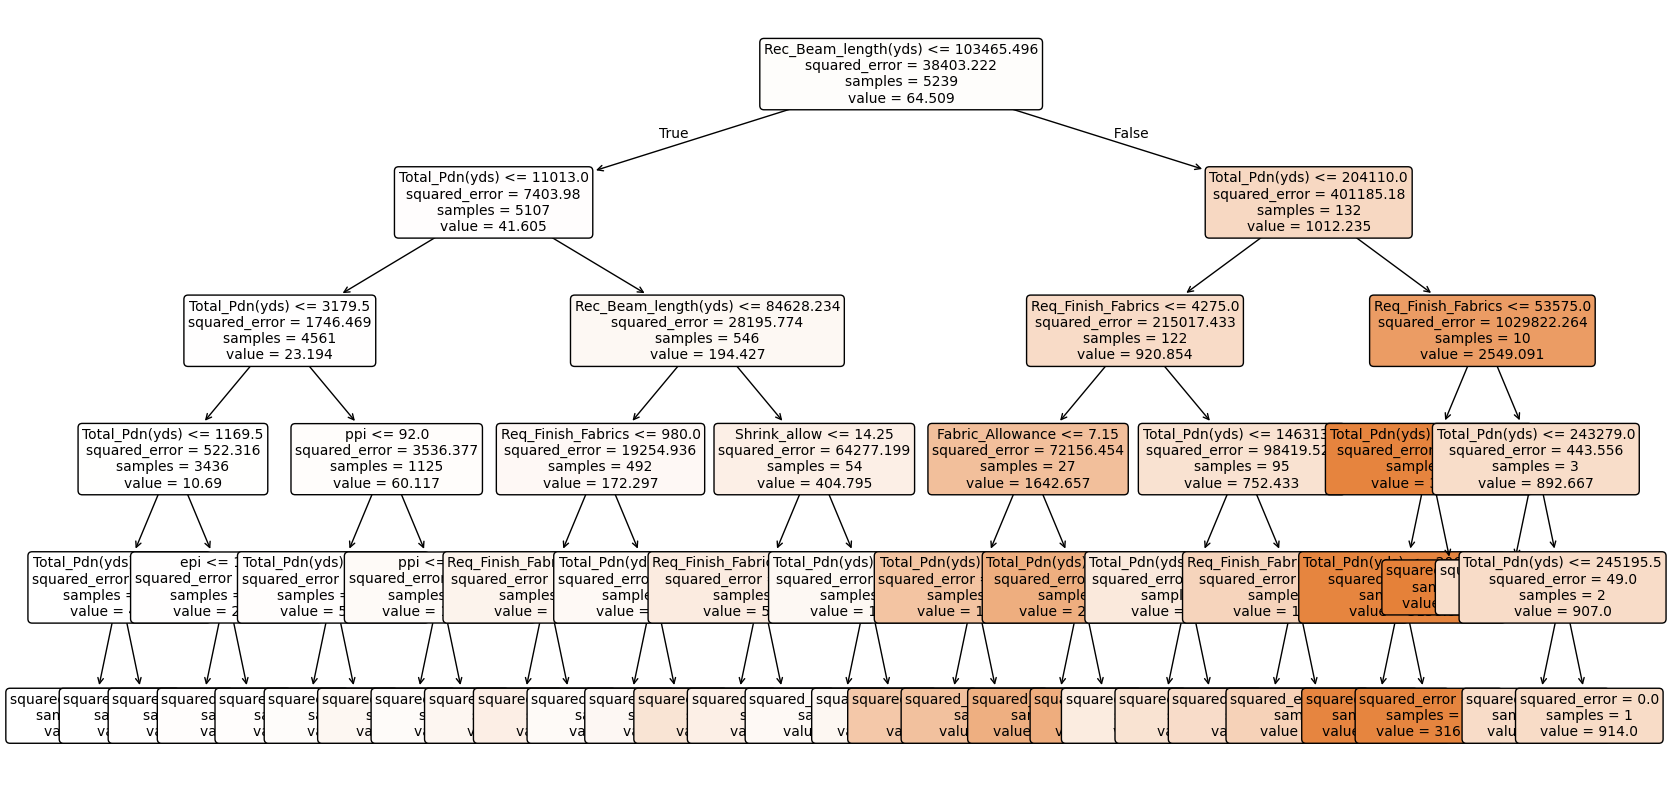

In [810]:
# Extract a single tree from the Random Forest
single_tree = regressor_rfr.estimators_[0]  # Pick the first tree

# Visualize using export_graphviz and graphviz
dot_data = export_graphviz(
    single_tree,
    out_file=None,  # Export directly as string
    feature_names=X_train.columns if hasattr(X_train, 'columns') else None,  # Use feature names if available
    filled=True,    # Color the nodes based on predictions
    rounded=True,   # Rounded corners for better readability
    special_characters=True
)

# Render the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")  # Saves the visualization to a file called 'DecisionTree'
graph.view()                  # Open the file in your default viewer (or show inline in Jupyter)

# Inline visualization using plot_tree
plt.figure(figsize=(20, 10))  # Adjust size for readability
plot_tree(
    single_tree,
    feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


The above random forest model is only for easy visualisation purposes the actuaL OPTIMAL MODEL with greater accuracy is as below


n_estimator chosen by trial and also keeping in mind not too overfit or increase complexity or time.Random_state is set to get consistent result

In [811]:
regressor_rfr = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_rfr.fit(X_train, y_train)

####Method used for trial to find best n
# param_distributions = {
#     'n_estimators': [10, 50, 100, 200, 500],
#     'max_depth': [None, 10, 20],
# }

# random_search = RandomizedSearchCV(
#     estimator=RandomForestRegressor(random_state=0),
#     param_distributions=param_distributions,
#     scoring='neg_mean_squared_error',
#     n_iter=10,   # Number of parameter combinations to try
#     cv=3,        # Cross-validation folds
#     n_jobs=-1    # Use all available cores )

# print("Best Parameters:", random_search.best_params_)

RandomForestRegressor(n_estimators=200, random_state=0)

In [812]:
y_pred = regressor_rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[  3.05   0.  ]
 [123.27 139.  ]
 [ 21.11  29.  ]
 ...
 [  0.14   0.  ]
 [  7.45   0.  ]
 [ 65.09  54.  ]]


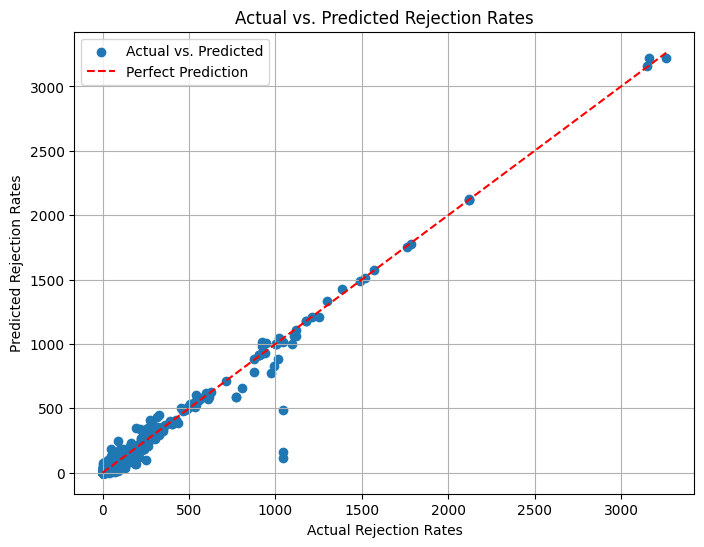

In [813]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [814]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9718010479775304

Very good accuracy

Final Model with best accuracy without boosting

Accuracy:~ 97%

## GradientBoostingRegressor Scikit

In [815]:
regressor_gbr = GradientBoostingRegressor(max_depth=5, n_estimators=500,learning_rate=0.05, random_state=42,criterion='friedman_mse')
regressor_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500,
                          random_state=42)

In [816]:
y_pred = regressor_gbr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[  7.56   0.  ]
 [104.57 139.  ]
 [ 19.85  29.  ]
 ...
 [  2.18   0.  ]
 [  6.86   0.  ]
 [ 57.06  54.  ]]


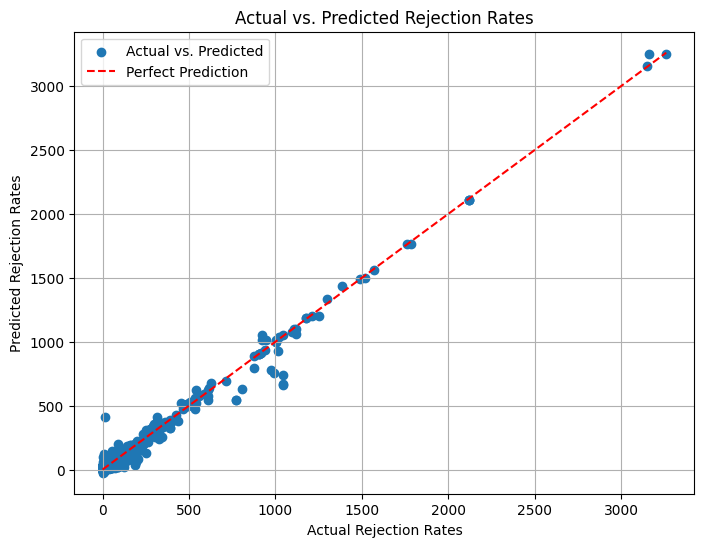

In [817]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [818]:
r2_score(y_test, y_pred)

0.9848724328476842

Improved accuracy:~98%

## XGBRegressor

In [819]:
regressor_xg = XGBRegressor(max_depth=5,learning_rate=0.05,min_child_weight=2,n_estimators=500)
regressor_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [820]:
parameters = {
    'n_estimators': [100, 200, 500],
    'max_depth':[2, 3, 5, 6],
    'learning_rate':[0.05,0.1,0.20],
    'min_child_weight':[1,2],
    'base_score':[0.25,0.5,0.75]
    }
random_cv = RandomizedSearchCV(estimator=regressor_xg,
            param_distributions=parameters,
            cv=5, n_iter=50,
            scoring = 'r2',n_jobs = -1,
            verbose = 0,
            return_train_score = True,
            random_state=0)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_


XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [821]:
y_pred = regressor_xg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[  8.8    0.  ]
 [ 89.56 139.  ]
 [ 19.96  29.  ]
 ...
 [ -0.93   0.  ]
 [ 14.6    0.  ]
 [ 53.35  54.  ]]


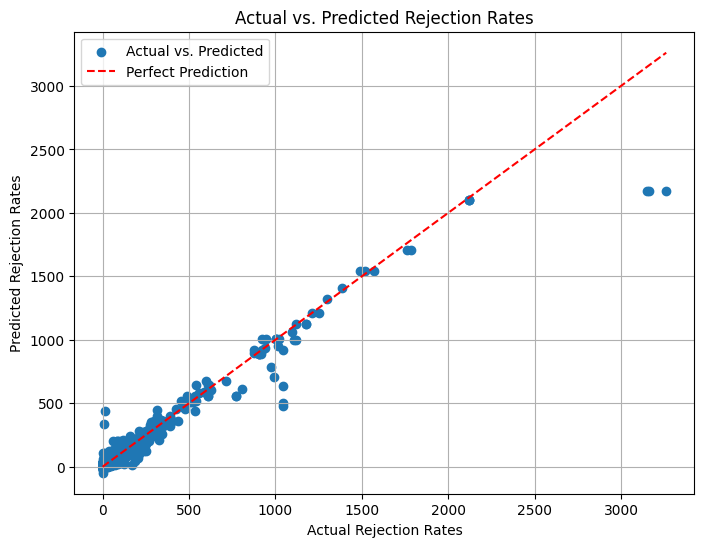

In [822]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')  # Add a diagonal line for reference
plt.xlabel('Actual Rejection Rates')
plt.ylabel('Predicted Rejection Rates')
plt.title('Actual vs. Predicted Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

In [823]:
r2_score(y_test, y_pred)

0.9460485577583313

Decreased Accuracy:~ 95% maybe due to overfitting also we can see that we are getting negative values of y pred which do not really make sense


#Conclusion

The best accuracy was achived with the GradientBoostingRegressor Scikit. Best Accuracy:~98%

The findings very intresting which emphasize the importance of precise parameter control in minimizing rejections and improving production efficiency. Recommendations include optimizing recommended beam length and total production, which directly affect rejection rates. This analysis provides a robust framework for enhancing quality control and cost efficiency in textile manufacturing, serving as a foundation for data-driven process optimization.By testing dropping the recommended beam length column and total production, drastically decreased the accuracy which shows that they are key factors in predicting the weaving rejection.




#Reference links

https://www.geeksforgeeks.org/decision-tree-implementation-python/

https://stackoverflow.com/questions/72543209/how-to-use-a-gradientboostingregressor-in-scikit-learn-with-3-output-dimensions

https://machinelearningmastery.com/xgboost-for-regression/

https://github.com/baguirre2651/Citi-Bike-Demand-Prediction-Project-